In [54]:
import pandas as pd
import seaborn as sns
import warnings 
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv("application_cleaned.csv")
df_two = pd.read_csv("application_cleaned.csv")

In [56]:
from sklearn.cluster import KMeans
error = [] 

for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

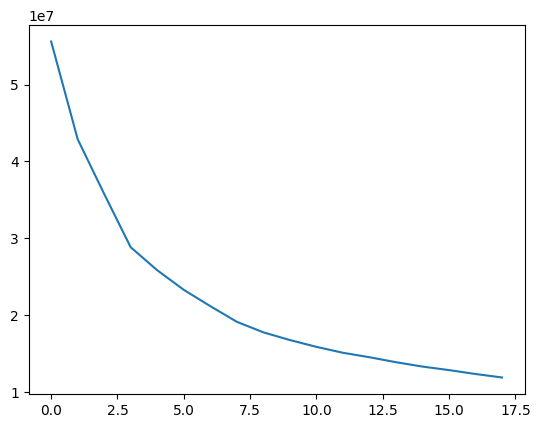

In [57]:

error = np.array(error)
plt.plot(error)

Reason for high levels of error can be attributed to the length of the dataset itself.

Since the SSE is the sum of the square root of the error of all the datapoints, and considering the big size of the dataset itself, we can therefore explain the high levels of error. However, let's have more number of clusters and judge individually.


In [58]:
kmeans = KMeans(n_clusters = 20, init = 'k-means++', max_iter = 2000, random_state = 42)
kmeans.fit(df)

KMeans(max_iter=2000, n_clusters=20, random_state=42)

In [59]:
df['clusters'] = kmeans.labels_
df['clusters'].value_counts()
df.columns

Index(['own_car', 'own_realty', 'num_child', 'income', 'age',
       'years_of_employment', 'mobile', 'work_phone', 'phone', 'email',
       'num_family_numbers', 'is_female', 'is_male', 'Commercial associate',
       'Pensioner', 'State servant', 'Student', 'Working', 'Academic degree',
       'Higher education', 'Incomplete higher', 'Lower secondary',
       'Secondary / secondary special', 'Civil marriage', 'Married',
       'Separated', 'Single / not married', 'Widow', 'Co-op apartment',
       'House / apartment', 'Municipal apartment', 'Office apartment',
       'Rented apartment', 'With parents', 'Government', 'Sales', 'Unemployed',
       'Unknown', 'has_previous_credit', 'count_X', 'count_C', 'months_late',
       'clusters'],
      dtype='object')

In [60]:
df.groupby('clusters')['income'].median()
# 1, 14, 10, 11

clusters
0     12.100718
1     11.938200
2     12.100718
3     12.100718
4     12.049425
5     12.049425
6     12.100718
7     11.967187
8     12.049425
9     12.100718
10    12.100718
11    11.967187
12    11.967187
13    11.813037
14    12.100718
15    12.142658
16    12.100718
17    12.100718
18    12.100718
19    12.100718
Name: income, dtype: float64

Let's think in the shoes of a bank.

When they want to approve credit cards, they will look at "red flags" to determine whether or not they will default.

We have identified two columns here:
1. If there is credit history - for the most part, the higher the number of months late, the more likely the person is to default.

2. If someone is being unemployed. This would mean that it will take some time for them to pay back credit and therefore it will be better to NOT approve the credit card.

In this case, it would mean that cluster 5 and 9 are problematic and should be avoided.

In [61]:
df['outcome']= df['clusters'].apply(lambda x: 0 if x in [1, 10, 11, 14] else 1)
df.drop('clusters', axis = 1, inplace = True)

In [63]:
df.to_csv("application_with_clusters.csv")